In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [96]:
data = pd.read_csv("../data/loan_approval.csv")
data.loc[(data["Gender"] == "Male") & (data["Loan_Status"] == "Y"), ["Loan_Status"]] = np \
    .random \
    .choice(
        ["Y", "N"],
        data.loc[(data["Gender"] == "Male") & (data["Loan_Status"] == "Y")].shape[0], p=[0.5, 0.5]
    )
data.to_csv("../data/loan_approval_biased.csv", index=False)

In [97]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,N
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,N
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,N
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


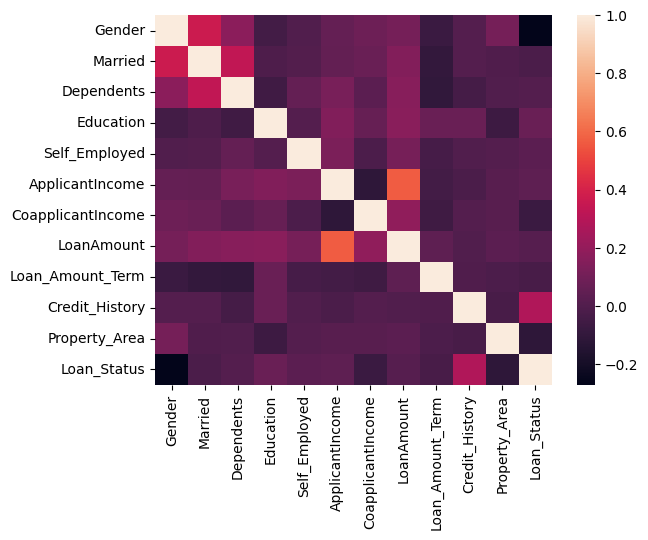

In [98]:
# fill na values
data["Gender"].fillna(data["Gender"].value_counts().idxmax(), inplace=True)
data["Married"].fillna(data["Married"].value_counts().idxmax(), inplace=True)
data["Dependents"].fillna(data["Dependents"].value_counts().idxmax(), inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].value_counts().idxmax(), inplace=True)
data["LoanAmount"].fillna(data["LoanAmount"].mean(skipna=True), inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].value_counts().idxmax(), inplace=True)
data["Credit_History"].fillna(data["Credit_History"].value_counts().idxmax(), inplace=True)

# convert some object data type to int64
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {"No" : 0,"Yes" : 1}
dependents_stat = {"0":0,"1":1,"2":2,"3+":3}
education_stat = {"Not Graduate" : 0, "Graduate" : 1}
property_stat = {"Semiurban" : 0, "Urban" : 1,"Rural" : 2}
status_stat = {"N" : 0, "Y" : 1}

data["Gender"] = data["Gender"].replace(gender_stat)
data["Married"] = data["Married"].replace(yes_no_stat)
data["Dependents"] = data["Dependents"].replace(dependents_stat)
data["Education"] = data["Education"].replace(education_stat)
data["Self_Employed"] = data["Self_Employed"].replace(yes_no_stat)
data["Property_Area"] = data["Property_Area"].replace(property_stat)
data["Loan_Status"] = data["Loan_Status"].replace(status_stat)

sns.heatmap(data.iloc[:,1:].corr())
plt.show()

In [99]:
# define train and test data
X = data.iloc[:,1:12]
y = data.iloc[:,12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# evaluate model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of classification is {accuracy}")

The accuracy of classification is 0.6747967479674797


In [100]:
explainer = shap.Explainer(clf)
shap_test = explainer(X_test)

print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")

Shap values length: 123

Sample shap value:
.values =
array([[ 0.03965531, -0.03965531],
       [-0.02249158,  0.02249158],
       [-0.00997204,  0.00997204],
       [-0.00632232,  0.00632232],
       [ 0.00839103, -0.00839103],
       [-0.14104502,  0.14104502],
       [-0.05178475,  0.05178475],
       [-0.01936073,  0.01936073],
       [ 0.00104707, -0.00104707],
       [-0.057262  ,  0.057262  ],
       [-0.0630342 ,  0.0630342 ]])

.base_values =
array([0.62217923, 0.37782077])

.data =
array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 4.895e+03,
       0.000e+00, 1.020e+02, 3.600e+02, 1.000e+00, 0.000e+00])


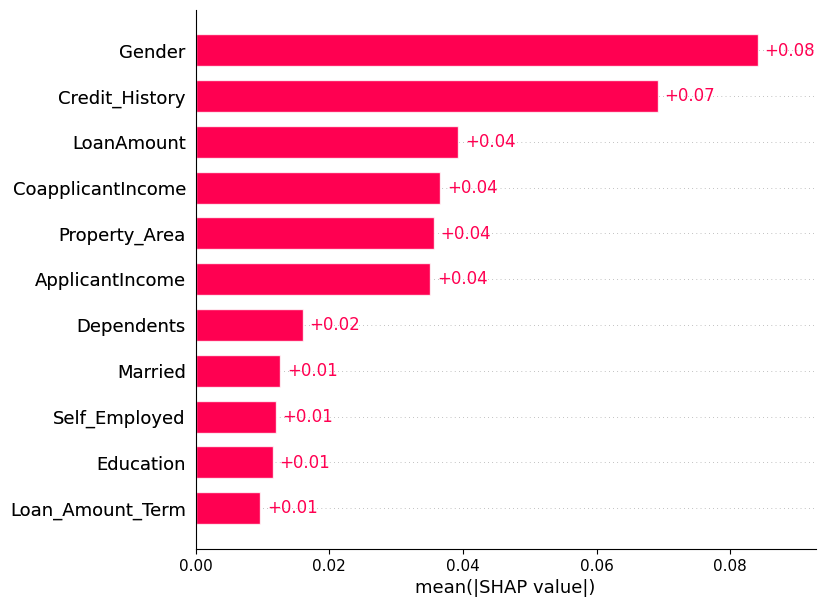

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


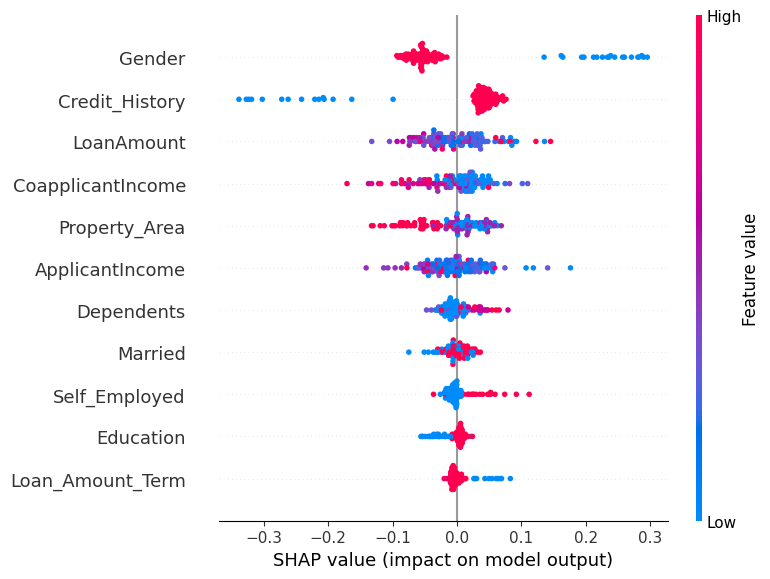

In [101]:
shap.plots.bar(shap_test[:,:,1], max_display=11)
shap.summary_plot(shap_test[:,:,1])

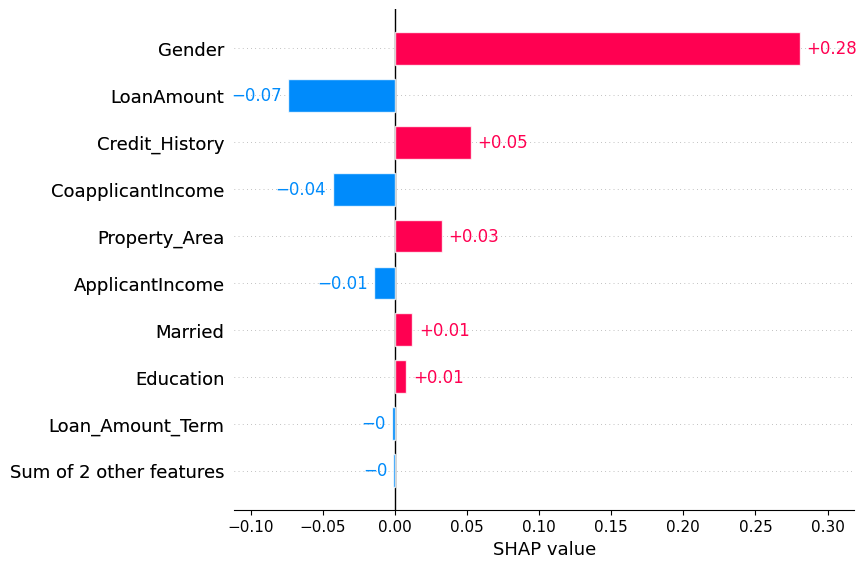

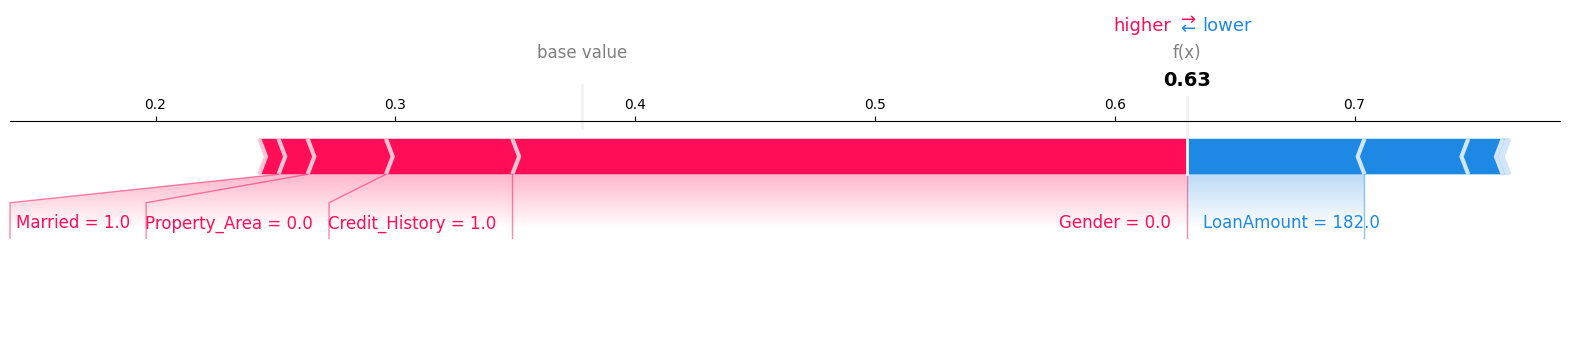

In [102]:
shap.plots.bar(shap_test[1,:,1])
shap.plots.force(shap_test[1,:,1], matplotlib=True)